In [2]:
import docplex
from docplex.mp.model import Model
mdl = Model(name='my_prob')


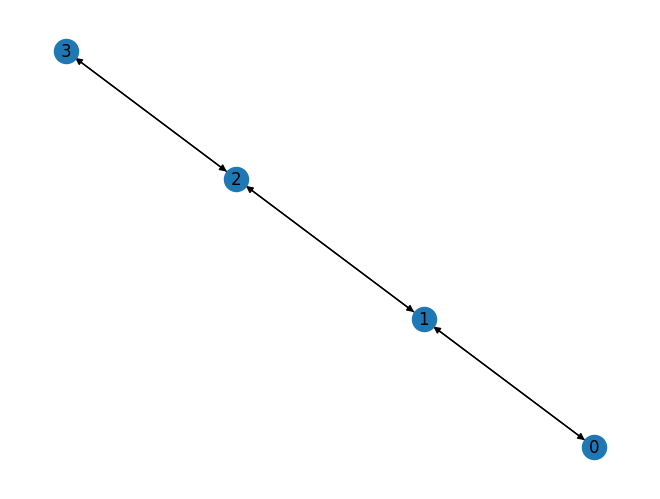

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
nodes=['0','1','2','3']
edges=[('0','1'),('1','0'),('1','2'),('2','1'),('2','3'),('3','2')]
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, )
plt.show()

['0', '1', '2', '3'] [('0', '1'), ('1', '0'), ('1', '2'), ('2', '1'), ('2', '3'), ('3', '2')]


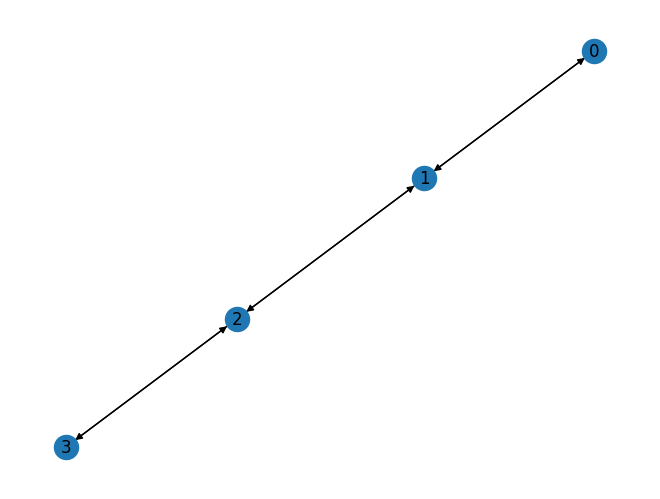

In [12]:
import os
import configparser
import ast
config_path = os.path.join(os.getcwd(), 'utils/topo_models.ini')
topo_config = configparser.ConfigParser()
topo_config.read(config_path)
nodes = topo_config.get('default', 'nodes')
nodes = ast.literal_eval(nodes)
edges = topo_config.get('default', 'edges')
edges = ast.literal_eval(edges)
print(nodes, edges)
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, )
plt.show()

拓扑序列：[1, 2, 3, 4, 5, 6, 7, 8]
关键路径的顶点：[1, 3, 5, 6, 8]
关键路径的边：[(1, 3), (3, 5), (5, 6), (6, 8)]
关键路径长度：51


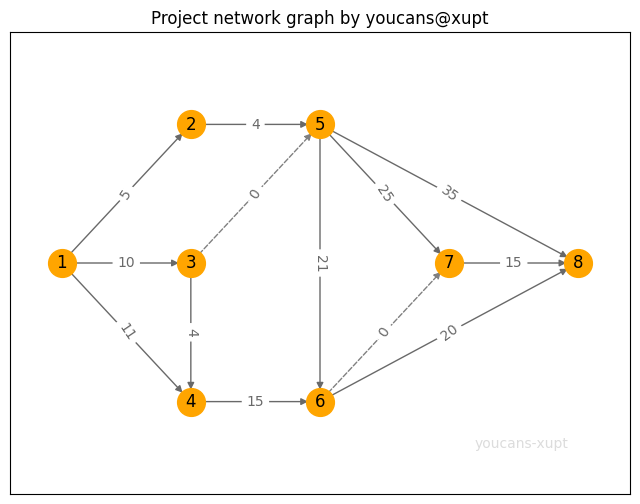

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. 拓扑序列(topological sequence) 和 关键路径(critical path)
# Activity on edge network(AOE), 顶点表示事件或状态，有向边表示活动
DG = nx.DiGraph()  # 创建：空的 有向图
DG.add_weighted_edges_from([(1, 2, 5), (1, 3, 10), (1, 4, 11),
                            (2, 5, 4),
                            (3, 4, 4), (3, 5, 0),
                            (4, 6, 15),
                            (5, 6, 21), (5, 7, 25), (5, 8, 35),
                            (6, 7, 0), (6, 8, 20),
                            (7, 8, 15)])  # 向图中添加多条赋权边: (n1,n2,weight)

lenNodes = len(DG.nodes) # 顶点数量
topoSeq = list(nx.topological_sort(DG)) # 拓扑序列
nodeCP = list(nx.dag_longest_path(DG))  # 关键路径（节点）
lenCP = nx.dag_longest_path_length(DG)  # 关键路径的长度
edgesCP=[]
for k in range(1,len(nodeCP)):
    edgesCP.append((nodeCP[k-1],nodeCP[k]))

print("拓扑序列：{}".format(topoSeq))  # [1, 3, 4, 2, 5, 6, 7, 8]
print("关键路径的顶点：{}".format(nodeCP))  # [1, 3, 5, 6, 8]
print("关键路径的边：{}".format(edgesCP))  # [(1, 3), (3, 5), (5, 6), (6, 8)]
print("关键路径长度：{}".format(lenCP))  # 51

fig, ax = plt.subplots(figsize=(8,6))
pos = {1:(0,4), 2:(5,7), 3:(5,4), 4:(5,1), 5:(10,7), 6:(10,1), 7:(15,4), 8:(20,4)}  # 指定顶点位置
edgesDG = DG.edges
edgesDashed = [(3,5),(6,7)]
edgesSolid = list(set(edgesDG)-set(edgesDashed))
labels = nx.get_edge_attributes(DG, 'weight')
# nx.draw(DG, pos, with_labels=True, node_color='skyblue')  # 绘制有向图
nx.draw_networkx_nodes(DG, pos, node_color='orange',node_size=400)  # 设置指定顶点的颜色、宽度
nx.draw_networkx_labels(DG, pos)  # 设置指定顶点的标签
nx.draw_networkx_edges(DG, pos, edgelist=edgesSolid, edge_color='dimgrey', style='solid')  # 设置指定边的颜色、线型
nx.draw_networkx_edges(DG, pos, edgelist=edgesDashed, edge_color='grey', style='dashed')  # 设置指定边，虚线
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels, font_color='dimgrey')  # 显示边的权值
ax.set_title("Project network graph by youcans@xupt")
ax.text(16, 0, "youcans-xupt", color='gainsboro')
plt.xlim(-2, 22)
plt.ylim(-1, 9)
plt.axis('on')
plt.show()  # YouCans, XUPT

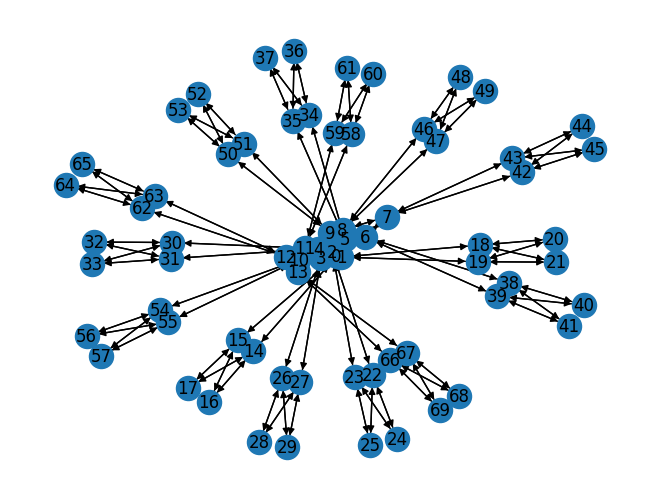

In [1]:
from utils.topo import Topo
import matplotlib.pyplot as plt
import networkx as nx

lstopo = Topo('leaf-spine')
lsgraph = lstopo.getGraph()
nx.draw(lsgraph, with_labels=True, )
plt.show()

In [124]:
import numpy as np

def generate_random_numbers():
    # 生成符合正态分布的随机数
    random_numbers = np.random.normal(loc=3.3, scale=1.0, size=3)

    # 调整随机数，使其总和为10
    adjusted_numbers = random_numbers / np.sum(random_numbers) * 10

    rounded_integers = np.ceil(adjusted_numbers)

    diff = 10 - int(np.sum(rounded_integers))

    rounded_integers[0] += diff

    return rounded_integers

result = generate_random_numbers()
print("生成的随机数:", result)
print("总和:", np.sum(result))

result = [int(x) for x in result]
dag_list = []
dag_num = 1
for i in range(3):
    dag_list.append(list(range(dag_num, dag_num + result[i])))
    dag_num += result[i]
print(dag_list)

生成的随机数: [1. 3. 6.]
总和: 10.0
[[1], [2, 3, 4], [5, 6, 7, 8, 9, 10]]


In [12]:
from utils.topo import Topo
import networkx as nx
import random
topo = Topo()
topo.initRandomTopo()

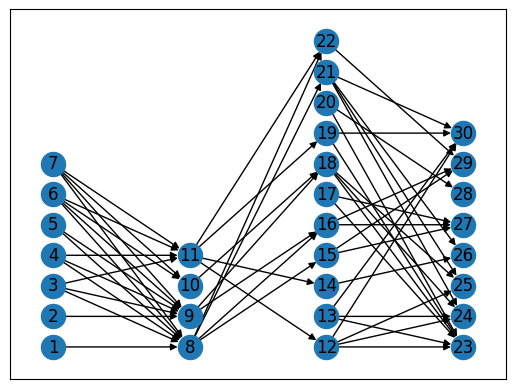

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 0, 0, 0, 0, 0, 0, 6, 6, 2, 4, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 6, 4, 3, 2, 3, 1, 3, 4]


In [13]:
topo.plotTopo()
print(topo.nodes)
print(topo.into_degree)

In [16]:
source_list = [node for node, ind in zip(topo.nodes, topo.into_degree) if ind == 0]
print(source_list)
select_source = random.sample(source_list, min(random.randint(1, 3), len(source_list)))
print(select_source)
destination_list = [node for node, outd in zip(topo.nodes, topo.out_degree) if outd == 0]
select_dst = random.sample(destination_list, 1)
print(select_dst)

[1, 2, 3, 4, 5, 6, 7, 13, 17, 20]
[17]
[29]


In [30]:
from collections import deque
from utils.flow import edges_to_nodes

g = topo.graph
alt_dst = set()
paths = []
# BFS
for source in select_source:
    visited = set()
    queue = deque([source])
    while queue:
        current_node = queue.popleft()
        neighbor_edges = g.edges(current_node)
        neighbor_nodes = [x for x in edges_to_nodes(neighbor_edges) if x != current_node]
        if current_node not in visited:
            visited.add(current_node)
            queue.extend(neighbor_nodes)
    print(visited)
    dst = set(destination_list) & visited
    print(dst)
    if not alt_dst:
        alt_dst = dst
    else:
        alt_dst = alt_dst & dst
    paths.append(list(visited))
dst = random.sample(list(alt_dst), 1)
print(dst)

task_nodes = set()
for path in paths:
    visited = set()
    queue = deque(dst)
    while queue:
        current_node = queue.popleft()
        neighbor_edges = g.in_edges(current_node)
        neighbor_nodes = [x for x in edges_to_nodes(neighbor_edges) if x != current_node]
        neighbor_nodes = set(neighbor_nodes) & set(path)
        if current_node not in visited:
            visited.add(current_node)
            queue.extend(neighbor_nodes)
    print(visited)
    if not task_nodes:
        task_nodes = visited
    else:
        task_nodes = task_nodes | visited

print(f'task_nodes: ', task_nodes)

{6, 10, 13, 14, 17, 18, 19, 22, 24, 25, 26, 28, 29, 30}
{25, 26, 28, 29, 30}
{8, 9, 11, 20, 22, 24, 25, 26, 27, 28, 29, 30}
{25, 26, 27, 28, 29, 30}
{5, 10, 13, 14, 15, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30}
{25, 26, 28, 29, 30}
[29]
{6, 10, 13, 14, 17, 18, 22, 29}
{8, 9, 11, 20, 22, 29}
{5, 10, 13, 14, 15, 17, 18, 22, 29}
task_nodes:  {5, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 29}


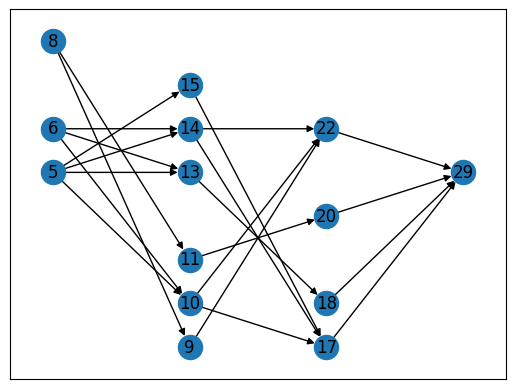

In [32]:
sub_g = nx.subgraph(g, task_nodes)
nx.draw_networkx(sub_g, arrows=True, pos=topo._position)

In [2]:
from utils.topo import Topo
from utils.flow import TaskFlowGenerator, CoFlow
import networkx as nx
import matplotlib.pyplot as plt

topo = Topo(weighted=True)
generator = TaskFlowGenerator(topo)
flowlist = generator.flowGenerate(nums=3)

plt.subplot(221)
nx.draw_networkx(topo.graph, arrows=True, pos=topo.position)
plt.subplot(222)
nx.draw_networkx(flowlist[0], arrows=True, pos=topo.position)
plt.subplot(223)
nx.draw_networkx(flowlist[1], arrows=True, pos=topo.position)
plt.subplot(224)
nx.draw_networkx(flowlist[2], arrows=True, pos=topo.position)

In [3]:
coflows = []
for i, flow in enumerate(flowlist):
    coflows.append(CoFlow(i, topo, flow))

for coflow in coflows:
    print(coflow._edges)

[WeightedEdge(15), WeightedEdge(16), WeightedEdge(17), WeightedEdge(25), WeightedEdge(26), WeightedEdge(36), WeightedEdge(37), WeightedEdge(38), WeightedEdge(40), WeightedEdge(41), WeightedEdge(42), WeightedEdge(49), WeightedEdge(54), WeightedEdge(56), WeightedEdge(61), WeightedEdge(64)]
[WeightedEdge(1), WeightedEdge(6), WeightedEdge(7), WeightedEdge(31), WeightedEdge(33), WeightedEdge(41), WeightedEdge(53), WeightedEdge(57)]
[WeightedEdge(3), WeightedEdge(4), WeightedEdge(25), WeightedEdge(42), WeightedEdge(67)]


In [4]:
[generation for generation in nx.topological_generations(flowlist[1])]

[[1, 3], [14, 16, 12], [20, 21], [28]]

In [5]:
topoSeq = list(nx.topological_sort(flowlist[1]))
print(topoSeq)
print(topoSeq[::-1])

[1, 3, 14, 16, 12, 20, 21, 28]
[28, 21, 20, 12, 16, 14, 3, 1]


In [6]:
criticalPath = list(nx.dag_longest_path(flowlist[1]))
print(criticalPath)

[1, 14, 20, 28]


In [7]:
print(coflows[1].etv)
print(coflows[1].ltv)
print(coflows[1].ete)
print(coflows[1].lte)
print(coflows[1].cp)

{1: 0, 3: 0, 14: 30, 16: 13, 12: 29, 20: 52, 21: 63, 28: 91}
{28: 91, 21: 73, 20: 52, 12: 29, 16: 53, 14: 30, 3: 0, 1: 0}
{(1, 14): 0, (3, 16): 0, (3, 12): 0, (12, 21): 29, (14, 20): 30, (16, 21): 13, (20, 28): 52, (21, 28): 63}
{(1, 14): 0, (3, 16): 40, (3, 12): 0, (12, 21): 39, (14, 20): 30, (16, 21): 63, (20, 28): 52, (21, 28): 73}
[(1, 14), (3, 12), (14, 20), (20, 28)]
